In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [3]:
# define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/processing_1"
processed_data_dir = "../../data/processed"
land_file_path = os.path.join(data_dir, "landcover.csv")

In [4]:
land_df = pd.read_csv(land_file_path)

## add label to LCCCode and GRIDCODE

In [41]:
legend_lcccode_path = r"C:\Users\T14s\Desktop\M2\Data mining\data\globcover_LCCS_legend_africa.xls"
legend_gridcode_path = r"C:\Users\T14s\Desktop\M2\Data mining\data\globcover_legend.xls"

In [42]:
# merge with lccode legend on LCCCode and get LCCLabel
lccode_df = pd.read_excel(legend_lcccode_path)
merged_df = land_df.merge(lccode_df[['LCCCode', 'LCCLabel']], left_on='LCCCode', right_on='LCCCode', how='left')
# merge with gridcode legend on GRIDCODE for land and Value for legend and get Label
gridcode_df = pd.read_excel(legend_gridcode_path)
merged_df = merged_df.merge(gridcode_df[['Value', 'Label']], left_on='GRIDCODE', right_on='Value', how='left')

In [43]:
merged_df.head()

,ID,GRIDCODE,AREA_M2,LCCCode,geometry,LCCLabel,Value,Label
0,4,210,6.228187e+06,7001 // 8001,POLYGON ((6.415277779717008 37.086959465484505...,Artificial Waterbodies\r\n // Natural Waterbodies,210.0,Water bodies
1,2,210,6.242408e+06,7001 // 8001,POLYGON ((7.180840924329724 37.079166666715295...,Artificial Waterbodies\r\n // Natural Waterbodies,210.0,Water bodies
2,1,210,1.482995e+06,7001 // 8001,"POLYGON ((7.371374609418377 37.0819444444929, ...",Artificial Waterbodies\r\n // Natural Waterbodies,210.0,Water bodies
3,8,50,4.590841e+08,21497-121340,"POLYGON ((6.123611113048653 36.68472222226833,...",Broadleaved Deciduous Closed to Open (100-40)%...,50.0,Closed (>40%) broadleaved deciduous forest (>5m)
4,13,210,6.371533e+06,7001 // 8001,"POLYGON ((6.261814820345212 37.02361111115902,...",Artificial Waterbodies\r\n // Natural Waterbodies,210.0,Water bodies


In [44]:
merged_df.isna().sum()

ID               0
GRIDCODE         0
AREA_M2          0
LCCCode          0
geometry         0
LCCLabel         0
Value       118326
Label       118326
dtype: int64

## Deal with nan values in Gridcode label

since combination of gridcode and lcccode is unique, and wa have missing values in gridcode (they don't exist in legend) we can drop the column

In [45]:
# drop GRIDCODE column and Value,Label column as they are not needed anymore
merged_df = merged_df.drop(columns=['GRIDCODE', 'Value', 'Label'])

## create is_veg column for LCCCode

In [46]:
# print unique lccodes with their labels
merged_df[['LCCCode', 'LCCLabel']].drop_duplicates().sort_values('LCCCode')

,LCCCode,LCCLabel
27,0003 / 0004,Cultivated and Managed Terrestrial Area(s)\r\n...
9,0004 // 0003,Natural And Semi-Natural Primarily Terrestrial...
731,0010,Artificial Surfaces and Associated Area(s)
1639,0011,Bare Area(s)
1091,11490 // 11494,Rainfed Tree Crop(s)\r\n // Rainfed Shrub Crop(s)
10,11498,Rainfed Herbaceous Crop(s)
203,20049 // 20058,Sparse Woody Vegetation\r\n // Herbaceous Spar...
1681,20058,Herbaceous Sparse Vegetation
57,21446 // 21450-121340 / 21454,Closed to Open Trees\r\n // Closed to Open (10...
6,21450,Closed to Open Shrubland (Thicket)


Non-Vegetated Codes:
- 0011: Bare Area(s)
- 6001: Consolidated Material(s)
- 7001 // 8001: Artificial Waterbodies // Natural Waterbodies

In [58]:
excluded_codes = [
    "0011",
    "6001",
    "7001 // 8001"
]


In [59]:
# Create a new column 'lcc_is_veg' in merged_df using excluded_codes
merged_df['lcc_is_veg'] = ~merged_df['LCCCode'].isin(excluded_codes)

# Check unique LCCCodes with labels and the new column
merged_df[['LCCCode', 'LCCLabel', 'lcc_is_veg']].drop_duplicates().sort_values('LCCCode')


,LCCCode,LCCLabel,lcc_is_veg
27,0003 / 0004,Cultivated and Managed Terrestrial Area(s)\r\n...,True
9,0004 // 0003,Natural And Semi-Natural Primarily Terrestrial...,True
731,0010,Artificial Surfaces and Associated Area(s),True
1639,0011,Bare Area(s),False
1091,11490 // 11494,Rainfed Tree Crop(s)\r\n // Rainfed Shrub Crop(s),True
10,11498,Rainfed Herbaceous Crop(s),True
203,20049 // 20058,Sparse Woody Vegetation\r\n // Herbaceous Spar...,True
1681,20058,Herbaceous Sparse Vegetation,True
57,21446 // 21450-121340 / 21454,Closed to Open Trees\r\n // Closed to Open (10...,True
6,21450,Closed to Open Shrubland (Thicket),True


In [60]:
# check lcc_is_veg values counts and percentages
lcc_is_veg_counts = merged_df['lcc_is_veg'].value_counts()
lcc_is_veg_percentages = merged_df['lcc_is_veg'].value_counts(normalize=True) * 100

print("LCC is veg counts:")
print(lcc_is_veg_counts)

print("\nLCC is veg percentages:")
print(lcc_is_veg_percentages)

LCC is veg counts:
lcc_is_veg
False    234616
True     203897
Name: count, dtype: int64

LCC is veg percentages:
lcc_is_veg
False    53.502633
True     46.497367
Name: proportion, dtype: float64


## Drop unnecessary cols

In [50]:
merged_df.columns

Index(['ID', 'AREA_M2', 'LCCCode', 'geometry', 'LCCLabel', 'lcc_is_veg'], dtype='object')

In [51]:
# check if geometry is unique
merged_df['geometry'].is_unique

True

In [52]:
# drop ID, AREA_M2
merged_df = merged_df.drop(columns=['ID', 'AREA_M2'])

## Some viz

In [ ]:
import geopandas as gpd
from shapely import wkt

merged_df['geometry'] = merged_df['geometry'].apply(wkt.loads)

In [62]:

merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry', crs='EPSG:4326')


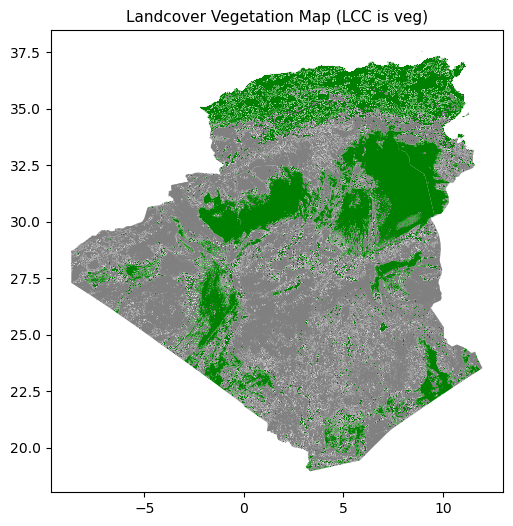

In [63]:
# Define color mapping
color_dict = {True: 'green', False: 'grey'}
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
merged_gdf.plot(color=merged_gdf['lcc_is_veg'].map(color_dict), ax=ax)
ax.set_title('Landcover Vegetation Map (LCC is veg)', fontsize=11)
plt.savefig(os.path.join(Images_dir, 'landcover_lcc_is_veg_map.png'), dpi=300)
plt.show()


## save

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438513 entries, 0 to 438512
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   LCCCode     438513 non-null  object
 1   geometry    438513 non-null  object
 2   LCCLabel    438513 non-null  object
 3   lcc_is_veg  438513 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 10.5+ MB


In [65]:
merged_df.to_csv(os.path.join(processed_data_dir, 'landcover.csv'), index=False)